In [1]:
import pandas as pd
import numpy as np

### Import CSV

In [2]:
QBSale = pd.read_csv('C:\\Users\\robjac\\Documents\\Jupyter\\Data\\QB_Sale_by_Customer.csv')

### Remove Columns

In [3]:
QBSale = QBSale.drop(['Type','Date','Num','Memo','Amount'], axis=1)

### Replace NaN with Empty Space

In [4]:
QBSale = QBSale.fillna('')

### Find feild names with Total in them

In [5]:
QBSale = QBSale[QBSale['Unnamed: 0'].str.contains('Total')]

### Rename First Column to Customer

In [6]:
QBSale = QBSale.rename(columns={'Unnamed: 0': 'Customer'})

### Find Customers that owe more than $10,000

In [7]:
QBSale = QBSale[QBSale['Open Balance'] > 10000]

### Remove 'Total' String from first feild

In [8]:
QBSale['Customer'] = QBSale['Customer'].str.replace(r'Total ', '')

In [9]:
QBSale = QBSale.sort_values(by=['Open Balance'])

### Reformat Open Balance

In [10]:
QBSale['Open Balance'] = QBSale['Open Balance'].apply(lambda x: f"${x/1000:.1f}k")

### Import MatPlotLib

In [11]:
from matplotlib import pyplot as plt

### Create Visualization of Data

In [12]:
QBSale.head(50)

,Customer,Open Balance
204,Michigan OHD & Loading Dock Co,$10.4k
256,OHD OF WINNIPEG,$11.2k
216,MIDWEST OHD - WI,$13.0k
232,NGC OHD,$14.9k
162,HQI Door Co.,$16.3k
94,DNL GARAGE DOOR SYSTEMS INC,$17.2k
51,BLUE IGUANA CAR WASH,$18.9k
250,OHD OF FRANKLIN,$20.8k
349,SUMMERS GARAGE DOOR,$22.4k
308,Sawhorse LLC,$23.0k


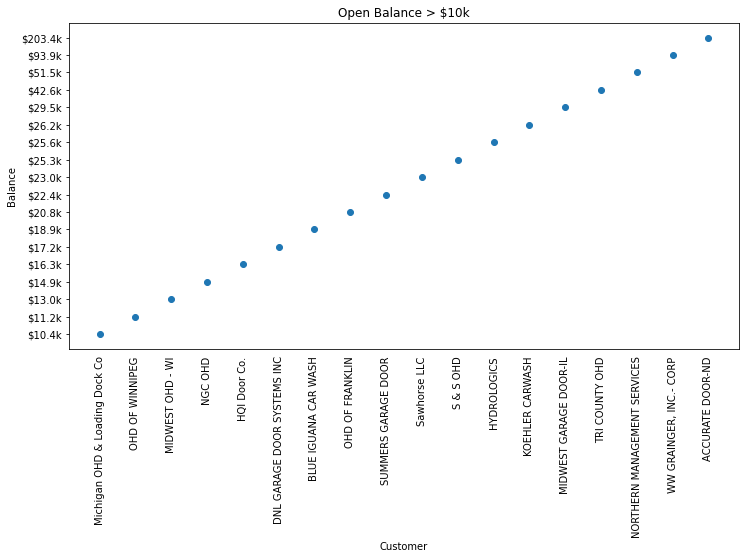

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))
saleRange = np.arange(10000,210000,5000)
plt.plot(QBSale['Customer'],QBSale['Open Balance'],'o')
plt.title("Open Balance > $10k")
plt.xlabel("Customer")
plt.ylabel("Balance")
plt.tick_params(bottom=False)
plt.xticks(x[::1],  rotation='vertical')
plt.show()